In [1]:
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import xavier_initializer
import tensorflow as tf
import mnist_handling as mn

tf.set_random_seed(66666)

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

xs = tf.placeholder(tf.float32, [None, 784])
xx = tf.placeholder(tf.float32, [1, None, None, 1])
ys = tf.placeholder(tf.float32, [None, 10])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


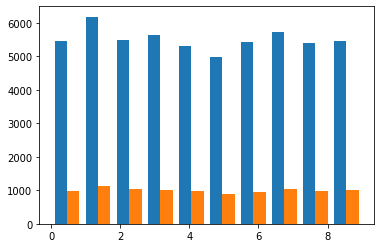

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist((np.argmax(mnist.train.labels,axis = 1),np.argmax(mnist.test.labels,axis = 1)))
plt.show()

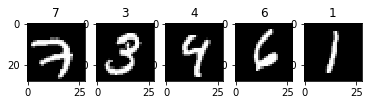

In [3]:
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(np.squeeze(np.reshape(mnist.train.images[i], newshape=[28,28])), cmap='gray')
  plt.title(np.argmax(mnist.train.labels[i],axis = 0))
plt.show()

In [0]:
def conv_net(data):
  # print(data.get_shape())
  # input = tf.reshape(data, [-1, 28, 28, 1])
  # print("hello mr sandman", tf.shape(data))
  
  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=data,
      filters=32,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #2
  conv2 = tf.layers.conv2d(
      inputs=conv1,
      filters=32,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  pool1 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Convolutional Layer #3
  conv3 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #4
  conv4 = tf.layers.conv2d(
      inputs=conv3,
      filters=64,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #5
  conv5 = tf.layers.conv2d(
      inputs=conv4,
      filters=128,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #6
  conv6 = tf.layers.conv2d(
      inputs=conv5,
      filters=10,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # pool2 = tf.layers.max_pooling2d(inputs=conv6, pool_size=[4, 4], strides=4)
  pool2 = tf.reduce_max(input_tensor = conv6, axis = [1,2])

  flat = tf.reshape(pool2, [-1, 10])

  # prediction
  predictions = tf.nn.softmax(flat)
  return predictions

In [5]:
predictions = conv_net(mn.tf_complicater(xs))

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(predictions), reduction_indices=[1]))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=predictions, labels=ys)

train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

# compute the accuracy
correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(ys, 1))

accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))


pred = conv_net(xx)
fin = tf.argmax(pred, 1)
# fin = tf.cast(res, tf.float32)


tmp = 0
loss_log = []

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


In [6]:
!git clone https://github.com/gleblo/msu-science-work/

fatal: destination path 'msu-science-work' already exists and is not an empty directory.


In [0]:
import os
import random

dir_name = "msu-science-work/размеченное"
lst = os.listdir(dir_name)

test_list = ["msu-science-work/размеченное/" + name for name in lst]
random.shuffle(test_list)

In [8]:
test_list

['msu-science-work/размеченное/9_00044.jpg',
 'msu-science-work/размеченное/7_00017.jpg',
 'msu-science-work/размеченное/9_00041.jpg',
 'msu-science-work/размеченное/9_00026.jpg',
 'msu-science-work/размеченное/3_00259.jpg',
 'msu-science-work/размеченное/4_00014.jpg',
 'msu-science-work/размеченное/1_00328.jpg',
 'msu-science-work/размеченное/7_00153.jpg',
 'msu-science-work/размеченное/7_00033.jpg',
 'msu-science-work/размеченное/9_00141.jpg',
 'msu-science-work/размеченное/7_00013.jpg',
 'msu-science-work/размеченное/9_00082.jpg',
 'msu-science-work/размеченное/6_00030.jpg',
 'msu-science-work/размеченное/4_00332.jpg',
 'msu-science-work/размеченное/1_00563.jpg',
 'msu-science-work/размеченное/7_00284.jpg',
 'msu-science-work/размеченное/0_00063.jpg',
 'msu-science-work/размеченное/0_00118.jpg',
 'msu-science-work/размеченное/8_00061.jpg',
 'msu-science-work/размеченное/7_00106.jpg',
 'msu-science-work/размеченное/6_00121.jpg',
 'msu-science-work/размеченное/8_00160.jpg',
 'msu-scie

In [0]:
# from google.colab.patches import cv2_imshow
# cv2_imshow("0_00417.jpg")

In [10]:
import mnist_handling as mn
import time
import cv2
from google.colab.patches import cv2_imshow
t = time.clock()

saver = tf.train.Saver()

with tf.Session() as sess:
    
    init = tf.global_variables_initializer()
    sess.run(init)
    saver.save(sess, 'my_test_model')
    for i in range(30000):
        batch_xs, batch_ys = mnist.train.next_batch(256)
        batch_xs = batch_xs
        los = sess.run(cross_entropy, feed_dict={xs: batch_xs, ys: batch_ys})
        loss_log.append(los)

        sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})

        if (i + 1) % 100 == 0:
            answers = []        
            acc = sess.run(accuracy, feed_dict={
                xs: mnist.test.images,
                ys: mnist.test.labels
            })
            print("steps : %d " % (i + 1), "accuracy: ", acc, "time: ", time.clock() - t, "  ", time.clock())
            t = time.clock()
            random.shuffle(test_list)
            for img in test_list:
                image = cv2.imread(img)
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                new_image = (gray.copy()/255)[np.newaxis,:,:,np.newaxis]
                # print(new_image)
                # print(new_image.shape)
                # plt.imshow(np.squeeze(new_image), cmap='gray')
                # plt.show()    
                aa = sess.run(fin, feed_dict={xx: new_image})
                # print(aa)
                answers.append(aa[0])

            print(answers)
        # if acc > 0.98:
            
            # break
        

steps : 100  accuracy:  0.6161 time:  8.445246    14.890796
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
steps : 200  accuracy:  0.6474 time:  5.025801999999999    19.917035
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
steps : 300  accuracy:  0.742 time:  4.241522    24.1598
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7

KeyboardInterrupt: ignored

#Остальное

In [0]:
import cv2
from google.colab.patches import cv2_imshow
im = cv2.imread("image.png")

im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

ret, im_th = cv2.threshold(im_gray, 170, 255, cv2.THRESH_BINARY_INV)

ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


cv2_imshow(im_th)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]
i = 0
for rect in rects:
    i= i+1
    # Draw the rectangles
    # cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im[pt1:pt1+leng, pt2:pt2+leng]
    # cv2_imshow(roi)
    cv2.imwrite(format(leng, '05d') +"_" + format(i, '05d') + ".jpg" ,img = roi)
cv2_imshow(im)
# cv2.waitKey(0)

In [0]:
import os

dir_name = "/content/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".jpg"):
        os.remove(os.path.join(dir_name, item))

In [0]:

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [0]:
!zip -r /content/file.zip /content

In [0]:
from google.colab import files
files.download("/content/file.zip")
# os.remove("/content/", "file.zip")

In [0]:
import os
os.remove("/content/file.zip")